In [1]:
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Model
from keras.optimizers import Adam, SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGE = True

N_CLASSES = 7
EPOCHS =  10
PATIENCE = 5
TRAIN_PATH= r'S:\VIT AP\SummerInternship1\COVID 19\train'
VALID_PATH = r'S:\VIT AP\SummerInternship1\COVID 19\test'
MODEL_CHECK_WEIGHT_NAME = 'resnet_v1_chk.h5'

K.set_learning_phase(0)
model = ResNet50(input_shape=(224,224,3),include_top=False, weights='imagenet', pooling='avg')
K.set_learning_phase(1)
x = model.output
x = Dense(512, activation='relu')(x)
x = Dense(512, activation='relu')(x)
output = Dense(N_CLASSES, activation='softmax', name='custom_output')(x)
custom_resnet = Model(inputs=model.input, outputs = output)

for layer in model.layers:
    layer.trainable = False

custom_resnet.compile(Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
custom_resnet.summary()

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
traingen = datagen.flow_from_directory(TRAIN_PATH, target_size=(224,224), batch_size=32, class_mode='categorical')
validgen = datagen.flow_from_directory(VALID_PATH, target_size=(224,224), batch_size=32, class_mode='categorical', shuffle=False)

es_callback = EarlyStopping(monitor='val_acc', patience=PATIENCE, mode='max')
mc_callback = ModelCheckpoint(filepath=MODEL_CHECK_WEIGHT_NAME, monitor='val_acc', save_best_only=True, mode='max')
train_history = custom_resnet.fit_generator(traingen, steps_per_epoch=len(traingen), epochs= EPOCHS, validation_data=traingen, validation_steps=len(validgen), verbose=2, callbacks=[es_callback, mc_callback])

#custom_resnet.load_weights(MODEL_CHECK_WEIGHT_NAME)


Using TensorFlow backend.
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\shash\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
ac

bn4f_branch2b (BatchNormalizati (None, 14, 14, 256)  1024        res4f_branch2b[0][0]             
__________________________________________________________________________________________________
activation_39 (Activation)      (None, 14, 14, 256)  0           bn4f_branch2b[0][0]              
__________________________________________________________________________________________________
res4f_branch2c (Conv2D)         (None, 14, 14, 1024) 263168      activation_39[0][0]              
__________________________________________________________________________________________________
bn4f_branch2c (BatchNormalizati (None, 14, 14, 1024) 4096        res4f_branch2c[0][0]             
__________________________________________________________________________________________________
add_13 (Add)                    (None, 14, 14, 1024) 0           bn4f_branch2c[0][0]              
                                                                 activation_37[0][0]              
__________

Found 289 images belonging to 7 classes.
Found 76 images belonging to 7 classes.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/10
 - 52s - loss: 1.2507 - acc: 0.5898 - val_loss: 0.7467 - val_acc: 0.7500
Epoch 2/10
 - 39s - loss: 0.4812 - acc: 0.8548 - val_loss: 0.5034 - val_acc: 0.8438
Epoch 3/10
 - 43s - loss: 0.2916 - acc: 0.9053 - val_loss: 0.2038 - val_acc: 0.9479
Epoch 4/10
 - 38s - loss: 0.3281 - acc: 0.9022 - val_loss: 0.4630 - val_acc: 0.8154
Epoch 5/10
 - 41s - loss: 0.1764 - acc: 0.9337 - val_loss: 0.1400 - val_acc: 0.9792
Epoch 6/10
 - 39s - loss: 0.0849 - acc: 0.9842 - val_loss: 0.1203 - val_acc: 0.9479
Epoch 7/10
 - 38s - loss: 0.1150 - acc: 0.9558 - val_loss: 0.0800 - val_acc: 0.9692
Epoch 8/10
 - 44s - loss: 0.0849 - acc: 0.9750 - val_loss: 0.0481 - val_acc: 0.9896
Epoch 9/10
 - 38s - loss: 0.0616 - acc: 0.9745 - val_loss: 0.0187 - val_acc: 1.0000
Epoch 10/10
 - 36s - loss: 0.0340 - acc: 0.9874 - val_loss: 0.0504 - 

"#confusion matrix\n\nprint('Confusion Matrix')\ncm = metrics.confusion_matrix(validgen.classes, y_pred)\nprint(cm)\nbatch_size = 32\ntarget_names = ['crack','flakes','mould','spall']\nY_pred = model.predict_generator(validgen, 176 // batch_size+1)\ny_pred = np.argmax(Y_pred, axis=1)\n#classification report\nprint('Classification Report')\nprint(metrics.classification_report(validgen.classes, y_pred))"

3/3 [==============================] - 9s 3s/step
Confusion Matrix


C:\Users\shash\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


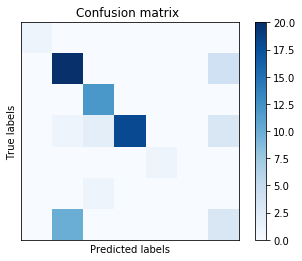

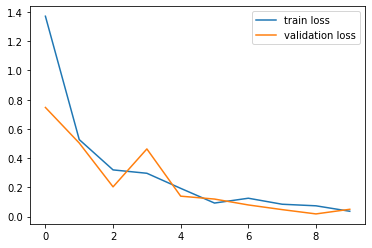

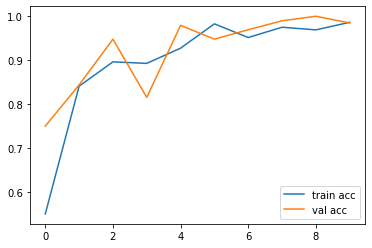

<Figure size 432x288 with 0 Axes>

In [2]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
predict = custom_resnet.predict_generator(validgen, steps=len(validgen), verbose=1)
test_labels = validgen.classes
#confusion matrix
print('Confusion Matrix')
confusion_matrix(test_labels, predict.argmax(axis=1))
#classification report
cr_labels = list(validgen.class_indices.keys())
classification_report(test_labels, predict.argmax(axis=1), target_names=cr_labels)

#accuracy score
accuracy_score(test_labels,predict.argmax(axis=1))


#plot for confusion matrix
import matplotlib.pyplot as plt
import numpy as np
cm = metrics.confusion_matrix(test_labels, predict.argmax(axis=1))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()

#plotting graphs
# loss
plt.plot(train_history.history['loss'], label='train loss')
plt.plot(train_history.history['val_loss'], label='validation loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# accuracies
plt.plot(train_history.history['acc'], label='train acc')
plt.plot(train_history.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

model.save('resnet50_without_dropout.h5')

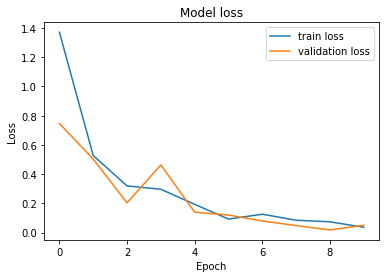

<Figure size 432x288 with 0 Axes>

In [3]:
# loss
plt.plot(train_history.history['loss'], label='train loss')
plt.plot(train_history.history['val_loss'], label='validation loss')
plt.legend()
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()
plt.savefig('LossVal_loss')

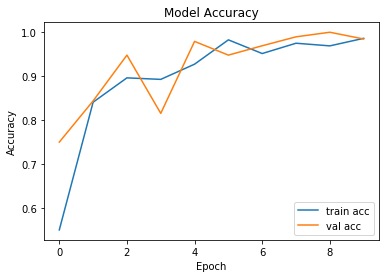

<Figure size 432x288 with 0 Axes>

In [4]:
# accuracies
plt.plot(train_history.history['acc'], label='train acc')
plt.plot(train_history.history['val_acc'], label='val acc')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('AccVal_acc')

In [5]:
import tensorflow as tf
from keras.models import load_model
custom_resnet.save('bestmodel_resNet_covid.h5')